In [91]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import math

### 四阶龙格库塔法

#### 构建方程

In [92]:
def fun(x, y):
    """微分方程"""
    return y + x


def cal_k(x, y, h):
    """计算k值"""
    k1 = fun(x, y) 
    k2 = fun(x + h/2, y + (h*k1)/2)
    k3 = fun(x + h/2, y + (h*k2)/2)
    k4 = fun(x + h, y + h*k3)
    return k1, k2, k3, k4

#### 迭代求解

In [93]:
# 计算预测值和精确值
y_pred = []
y_true = []
h = 0.1
y_post = 1.0 # 初始值
for x in np.arange(0, 100, h):
    y_pred.append(y_post)
    k1, k2, k3, k4 = cal_k(x, y_post, h)
    y_pre = y_post + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    y_true.append(2*np.exp(x) - x - 1)
    y_post = y_pre

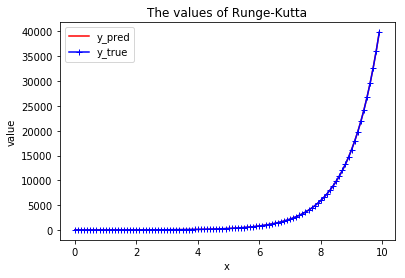

In [109]:
plt.plot(np.arange(0, 10, h), y_pred[:100], c = "r", label="y_pred")
plt.plot(np.arange(0, 10, h), y_true[:100], c = "b", marker="+",label="y_true")
plt.ylabel("value")
plt.xlabel("x")
plt.title("The values of Runge-Kutta")
plt.legend()
plt.show()

In [95]:
def plot_error(y_true, y_pred, name):
    df = pd.concat([pd.DataFrame(y_true), pd.DataFrame(y_pred)], axis=1)
    df.columns = ["真实值", "预测值"]
    df["绝对误差"] =  abs(df.真实值 - df.预测值)
    df["相对误差"] = abs((df.真实值 - df.预测值))/df.真实值
    df.绝对误差.plot(label="AE")
    df.相对误差.plot(label="RE")
    plt.ylabel("Error")
    plt.xlabel("X")
    plt.title("The different error of {}".format(name))
    plt.legend()
    plt.show()
    return df

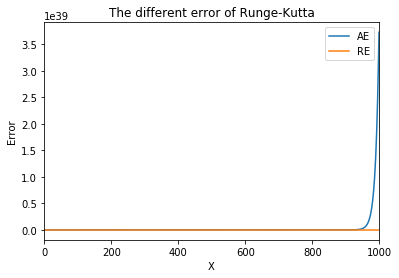

In [96]:
df = plot_error(y_true, y_pred, "Runge-Kutta")

In [97]:
df.head(20)

,真实值,预测值,绝对误差,相对误差
0,1.000000,1.000000,0.000000e+00,0.000000e+00
1,1.110342,1.110342,1.694846e-07,1.526418e-07
2,1.242806,1.242805,3.746190e-07,3.014301e-07
3,1.399718,1.399717,6.210269e-07,4.436802e-07
4,1.583649,1.583648,9.151212e-07,5.778559e-07
5,1.797443,1.797441,1.264207e-06,7.033363e-07
6,2.044238,2.044236,1.676597e-06,8.201577e-07
7,2.327505,2.327503,2.161747e-06,9.287830e-07
8,2.651082,2.651079,2.730400e-06,1.029919e-06
9,3.019206,3.019203,3.394754e-06,1.124386e-06


### Adam算法

#### 显式

In [98]:
y_pred[:5]

[1.0,
 1.1103416666666666,
 1.2428051417013888,
 1.3997169941250753,
 1.5836484801613713]

In [99]:
y_true[:5]

[1.0,
 1.1103418361512953,
 1.2428055163203395,
 1.3997176151520065,
 1.5836493952825408]

In [100]:
### 计算fn, fn-1, fn-2, fn-3
# 初始值
y0, y1, y2, y3 = y_pred[0], y_pred[1], y_pred[2], y_pred[3]
h = 0.1
y_true1 = y_true[:4]
y_pred1 = y_pred[:4]
y_post = y_pred[3]
for x in np.arange(0.4, 10, h):
  
    y_pre = y_post + (h/24)*(55*y3 -59*y2 + 37*y1 - 9*y0)
    y_true1.append(2*np.exp(x) - x - 1)
    y3, y2, y1, y0 = y_pre, y3, y2, y1
    y_pred1.append(y_pre)
    y_post = y_pre

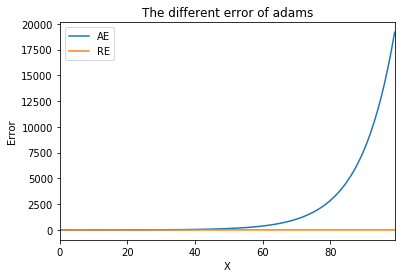

In [101]:
df1 = plot_error(y_true1, y_pred1, "adams")

In [102]:
df1.head(20)

,真实值,预测值,绝对误差,相对误差
0,1.000000,1.000000,0.000000e+00,0.000000e+00
1,1.110342,1.110342,1.694846e-07,1.526418e-07
2,1.242806,1.242805,3.746190e-07,3.014301e-07
3,1.399718,1.399717,6.210269e-07,4.436802e-07
4,1.583649,1.548640,3.500918e-02,2.210665e-02
5,1.797443,1.709401,8.804139e-02,4.898148e-02
6,2.044238,1.889616,1.546216e-01,7.563776e-02
7,2.327505,2.088685,2.388208e-01,1.026081e-01
8,2.651082,2.308270,3.428123e-01,1.293104e-01
9,3.019206,2.550993,4.682133e-01,1.550783e-01


#### 隐式

In [103]:
### 计算fn, fn-1, fn-2, fn-3
# 初始值
y0, y1, y2, y3 = y_pred[0], y_pred[1], y_pred[2], y_pred[3]
h = 0.1
y_true2 = y_true[:3]
y_pred2 = y_pred[:3]
y_post = y_pred[3]
i = 3 # 龙格库塔法起始值
for x in np.arange(0.3, 10, h):
    y_pred2.append(y_post)
    y_pre =  y_post + (h/24)*(y_pred[i]*8 + 19*y2 + 5*y1 + y0)
    y_true2.append(2*np.exp(x) - x - 1)
    y2, y1, y0 = y_pre, y2, y1
    i += 1
    y_post = y_pre

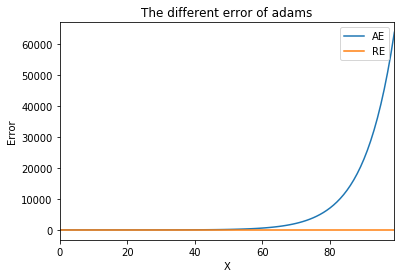

In [104]:
df2 = plot_error(y_true2, y_pred2,"adams" )

In [105]:
df2.head(20)

,真实值,预测值,绝对误差,相对误差
0,1.000000,1.000000,0.000000e+00,0.000000e+00
1,1.110342,1.110342,1.694846e-07,1.526418e-07
2,1.242806,1.242805,3.746190e-07,3.014301e-07
3,1.399718,1.399717,6.210269e-07,4.436802e-07
4,1.583649,1.572062,1.158764e-02,7.317051e-03
5,1.797443,1.779823,1.761942e-02,9.802494e-03
6,2.044238,2.018570,2.566747e-02,1.255601e-02
7,2.327505,2.290145,3.736071e-02,1.605182e-02
8,2.651082,2.598501,5.258111e-02,1.983383e-02
9,3.019206,2.948707,7.049947e-02,2.335033e-02


### 矩阵形式

In [106]:
## 初始值
y0 = np.array([[1], [0]])
A = np.array([[0, 1], [1, -2]])
B = 0
ut = 0
h = 0.1
n = 4 # 迭代次数
Y = np.zeros((2,n))

## 计算y值
for i in range(n):
    k1 =  np.matmul(A, y0)
    k2 = np.matmul(A, (y0 + (h/2)*k1))
    k3 = np.matmul(A, (y0 + (h/2)*k2))
    k4 = np.matmul(A, (y0 + h*k3))
    ## 计算y的近似值
    y1 = y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    Y[:, i] = y1.reshape(1, 2)
    y0 = y1

In [107]:
df3 = pd.DataFrame(Y, columns=["t1", "t2","t3", "t4"], index=["y1", "y2"])
df3

,t1,t2,t3,t4
y1,1.004687,1.017639,1.037473,1.063123
y2,0.090783,0.165935,0.228969,0.282654
